# **Bierproduktion**

Ein Unternehmen stellt zwei Biersorten A und B mit einem Deckungsbeitrag von 2,00 € bzw. 1,50 € je Liter her. 

Ein Liter A-Bier benötigt doppelt soviel Zeit bei seiner Abfüllung wie ein Liter B-Bier. Falls nur B-Bier produziert würde, könnte das Unternehmen 1000 Liter pro Tag abfüllen. 

Die Rohstoffbelieferung erlaubt nur die Produktion von 800 Liter Bier pro Tag (Typ A und Typ B zusammen). 

Für A- und B-Bier werden verschiedene Malzsorten verwendet. Es stehen täglich Malz für 400 Liter vom Typ A und 700 Liter vom Typ B zur Verfügung.

**Wie viel Liter Bier vom Typ A und vom Typ B müssen produziert werden, um den maximalen Deckungsbeitrag zu erzielen?** 

In [ ]:
%pip install pulp
import pulp
solver_list = pulp.listSolvers(onlyAvailable=True)
print(solver_list)

**1. Initialisierung des Optimierungsmodells und der Entscheidungsvariablen**

In [ ]:
lp_problem = pulp.LpProblem("LPProblem", pulp.LpMaximize)

x1 = pulp.LpVariable('x1', lowBound=0, cat='Continuous') #cat='Integer' für ganzzahlige Variablen  
x2 = pulp.LpVariable('x2', lowBound=0, cat='Continuous')

**2. Definition der Zielfunktion**

Ein Unternehmen stellt zwei Biersorten A und B mit einem Deckungsbeitrag von 2,00 € bzw. 1,50 € je Liter her. 

*(Ziel: Deckungsbeitrag maximieren!)*

In [ ]:
# Zielfunktion
lp_problem += 2 * x1 + 1.5 * x2, "Z"

**3. Definition der problemspezifischen Restriktionen**

*   Ein Liter A-Bier benötigt doppelt soviel Zeit bei seiner Abfüllung wie ein Liter B-Bier. Falls nur B-Bier produziert würde, könnte das Unternehmen 1000 Liter pro Tag abfüllen.
*   Die Rohstoffbelieferung erlaubt nur die Produktion von 800 Liter Bier pro Tag (Typ A und Typ B zusammen).
*   Für A- und B-Bier werden verschiedene Malzsorten verwendet. Es stehen täglich Malz für 400 Liter vom Typ A und 700 Liter vom Typ B zur Verfügung.



In [ ]:
# Restriktion für Abfülldauer
lp_problem += 2 * x1 + x2 <= 1000

In [ ]:
# Restriktion für homogene Rohstoffbelieferung
lp_problem += x1 + x2 <= 800

In [ ]:
# Restriktion für heterogene Rohstoffverfügbarkeit
lp_problem += x2 <= 700
lp_problem += x1 <= 400

**4. Generierung der optimalen Lösung**

In [ ]:
print(lp_problem)

lp_problem.solve()
print("Status:", pulp.LpStatus[lp_problem.status])

for variable in lp_problem.variables():
    print("{} = {}".format(variable.name, variable.varValue))

print("Deckungsbeitrag =",pulp.value(lp_problem.objective))

**Graphische Darstellung des Produktionsproblems**

Nur sinnvoll für darstellbare Probleme mit einer geeigneten Anzahl an Entscheidungsvariablen (2- bzw. 3-dimensional).

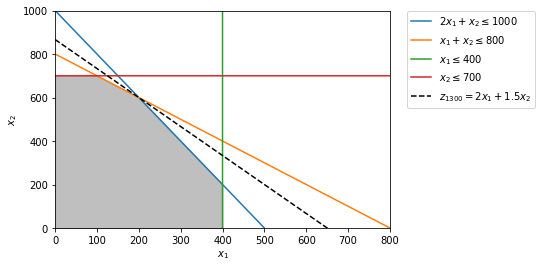

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Konstruktion der Restriktionslinien

# Kapazitätsuntergrenze Typ A: x1 >= 0
x1 = np.linspace(0, 1000, 2000)
# Kapazitätsuntergrenze Typ B: x2 >= 0
x2 = np.linspace(0, 1000, 2000)
# Herstellungsdauer: 2x1 + x2 <= 1000
x2_1 = -(x1*2) + 1000
# Homogene Rohstoffbelieferung: x1 + x2 <= 800
x2_2 = -(x1) + 800
# Heterogene Rohstoffverfügbarkeit Typ A: x1 <= 400
x1_1 = 400 + (x2 - x2)
# Heterogene Rohstoffverfügbarkeit Typ B: x2 <= 700 
x2_3 = 700 + (x1 - x1)


# Graphische Darstellung
plt.plot(x1, x2_1, label=r'$2x_1 + x_2\leq 1000$')
plt.plot(x1, x2_2, label=r'$x_1 + x_2\leq 800$')
plt.plot(x1_1, x2, label=r'$x_1 \leq 400$')
plt.plot(x1, x2_3, label=r'$x_2 \leq 700$')
plt.xlim((0, 800))
plt.ylim((0, 1000))
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')


# Füllen des zulässigen Lösungsraums
x3 = np.minimum(np.minimum(x2_1, x2_2), x2_3)
x4 = 0
plt.fill_between(np.minimum(x1, x1_1), x3, x4, where=x3>x4, color='grey', alpha=0.5)


# Konstruktion und Verschiebung der Zielfunktionskurve (Isogewinngerade)
for ZF in range(1300, 1800, 500):
  x2_z = (ZF - 2 * x1) / 1.5
  h = plt.plot(x1, x2_z, 'k--', label=r'$z_{%d} = 2x_1 + 1.5x_2$' %ZF)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)